In [304]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


# Data Preparation

In [305]:
data = pd.read_csv('AirBnB.csv')

In [306]:
sel_cols = ['neighbourhood_group',
'room_type',
'latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365']

In [307]:
df = data[sel_cols]

In [308]:
df.isna().sum()

neighbourhood_group                   0
room_type                             0
latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [309]:
df.reviews_per_month = df.reviews_per_month.fillna(0)

In [310]:
df.isna().sum()

neighbourhood_group               0
room_type                         0
latitude                          0
longitude                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Question 1 Answer

In [311]:
df.neighbourhood_group.mode()

0    Manhattan
dtype: object

# Split the data

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
numerical = ['latitude', 'longitude','minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365']

Question 2 Answer

In [314]:
numeric_corr =df_train[numerical].corr()
numeric_corr 

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
latitude,1.000000,0.080301,0.027441,-0.006246,-0.007159,0.019375,-0.005891
longitude,0.080301,1.000000,-0.060660,0.055084,0.134642,-0.117041,0.083666
minimum_nights,0.027441,-0.060660,1.000000,-0.076020,-0.120703,0.118647,0.138901
number_of_reviews,-0.006246,0.055084,-0.076020,1.000000,0.590374,-0.073167,0.174477
reviews_per_month,-0.007159,0.134642,-0.120703,0.590374,1.000000,-0.048767,0.165376
calculated_host_listings_count,0.019375,-0.117041,0.118647,-0.073167,-0.048767,1.000000,0.225913
availability_365,-0.005891,0.083666,0.138901,0.174477,0.165376,0.225913,1.000000


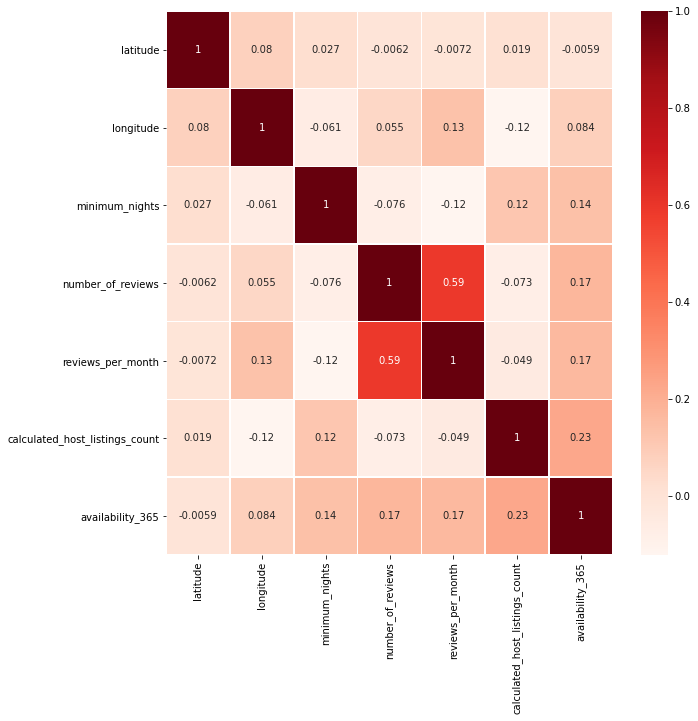

In [315]:
plt.figure(figsize=(10,10))  
sns.heatmap(numeric_corr,annot=True,linewidths=.5, cmap="Reds")
plt.show()

In [316]:
df_bin = df.copy()
mean = df_bin['price'].mean()
mean

152.7206871868289

In [317]:
df_bin['above_average'] = np.where(df_bin['price'] >= mean, 1, 0 )
df_bin

,neighbourhood_group,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,above_average
0,Brooklyn,Private room,40.64749,-73.97237,149,1,9,0.21,6,365,0
1,Manhattan,Entire home/apt,40.75362,-73.98377,225,1,45,0.38,2,355,1
2,Manhattan,Private room,40.80902,-73.94190,150,3,0,0.00,1,365,0
3,Brooklyn,Entire home/apt,40.68514,-73.95976,89,1,270,4.64,1,194,0
4,Manhattan,Entire home/apt,40.79851,-73.94399,80,10,9,0.10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Private room,40.67853,-73.94995,70,2,0,0.00,2,9,0
48891,Brooklyn,Private room,40.70184,-73.93317,40,4,0,0.00,2,36,0
48892,Manhattan,Entire home/apt,40.81475,-73.94867,115,10,0,0.00,1,27,0
48893,Manhattan,Shared room,40.75751,-73.99112,55,1,0,0.00,6,2,0


In [318]:
df_bin = df_bin.drop('price', axis = 1)

### Split data for Q3

In [319]:
df_full_train, df_test = train_test_split(df_bin, test_size= 0.2, random_state = 42)

In [320]:
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state = 42)

In [321]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [322]:
from sklearn.metrics import mutual_info_score
categorical = ['neighbourhood_group', 'room_type']

def cat_mi(series):
    return mutual_info_score(series, df_train.above_average)

Question 3 Answer

In [323]:
mutual_cat_info = df_train[categorical].apply(cat_mi).sort_values(ascending = False)

mutual_cat_info

room_type              0.143035
neighbourhood_group    0.046513
dtype: float64

In [324]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [325]:
from sklearn.feature_extraction import DictVectorizer 
from sklearn.linear_model import LogisticRegression

In [326]:
train_dicts = df_train[categorical +  numerical].to_dict(orient = 'records')

dv = DictVectorizer( sparse = False)

X_train = dv.fit_transform(train_dicts)

In [327]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [328]:
val_dicts = df_val[categorical +  numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

y_pred = model.predict(X_val)
 
print(y_pred)

print(y_val)


from sklearn.metrics import accuracy_score


[0 1 0 ... 0 0 1]
[0 0 1 ... 0 0 0]


Question 4 Answer

In [329]:
pred_acc = np.round(accuracy_score(y_val, y_pred), 2)
print(pred_acc)

0.79


Question 5 Answer

In [330]:
features =  categorical + numerical
import warnings
warnings.filterwarnings("ignore")

for feature in features:
    subset = features.copy()
    subset.remove(feature)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    
    X_train = dv.fit_transform(train_dicts)

    model = LogisticRegression(solver='lbfgs', C=1.0, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    feature_acc.append([score])
    
    print(feature, pred_acc - score, score)

neighbourhood_group 0.057512015543511597 0.7324879844564884
room_type 0.08399734124143576 0.7060026587585643
latitude 0.4842427651089069 0.30575723489109313
longitude 0.09585949483587286 0.6941405051641272
minimum_nights 0.004234584313324463 0.7857654156866756
number_of_reviews 0.0043368442581041 0.7856631557418959
reviews_per_month 0.004132324368544826 0.7858676756314552
calculated_host_listings_count 0.004439104202883737 0.7855608957971163
availability_365 0.011392780447898598 0.7786072195521014


In [331]:
train_dicts = df_train[categorical +  numerical].to_dict(orient = 'records')

dv = DictVectorizer( sparse = False)

X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical +  numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dicts)


Question 6 Answer

In [332]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [333]:
for alpha in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(random_state = 42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(alpha, round(score, 3))

0 0.376
0.01 0.376
0.1 0.376
1 0.376
10 0.376
